In [0]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

> # **Aula 023** - Redução de dimensionalidade - **Tensorflow: Autoencoders**
> Exemplo: Prever se cliente vai pagar ou não um empréstimo

In [71]:
base = pd.read_csv('credit-data.csv')
base = base.drop('i#clientid', axis= 1)
base = base.dropna()
base.head()

,income,age,loan,c#default
0,66155.925095,59.017015,8106.532131,0
1,34415.153966,48.117153,6564.745018,0
2,57317.170063,63.108049,8020.953296,0
3,42709.534201,45.751972,6103.642260,0
4,66952.688845,18.584336,8770.099235,1


In [72]:
base.shape

(1997, 4)

In [73]:
# preprocessing
scaler_x = StandardScaler()
base[['income',	'age',	'loan']] = scaler_x.fit_transform(base[['income',	'age',	'loan']])
base.head()

,income,age,loan,c#default
0,1.453898,1.336861,1.201907,0
1,-0.762398,0.536639,0.695744,0
2,0.836733,1.637207,1.173812,0
3,-0.183244,0.362998,0.544366,0
4,1.509532,-1.631534,1.419754,1


In [74]:
X = base.drop('c#default', axis= 1)
y = base['c#default']

colunas = [tf.feature_column.numeric_column(key = c) for c in X.columns]
colunas

[NumericColumn(key='income', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='loan', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [75]:
x_training, x_test, y_training, y_test = train_test_split(X, y, test_size= 0.3)

training_function = tf.estimator.inputs.pandas_input_fn(x= x_training, y= y_training,
                                                        batch_size= 8, num_epochs= None,
                                                        shuffle= True)

classificator = tf.estimator.DNNClassifier(feature_columns= colunas, hidden_units= [4,4])
classificator.train(input_fn= training_function, steps= 1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp8x2p7t40', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f50bd122748>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done c

In [76]:
test_function = tf.estimator.inputs.pandas_input_fn(x= x_test, y= y_test,
                                                    batch_size= 8, num_epochs= 1000,
                                                    shuffle= False)

test_metrics = classificator.evaluate(input_fn= test_function, steps= 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-02-21T01:57:10Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp8x2p7t40/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-02-21-01:57:13
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.973625, accuracy_baseline = 0.85375, auc = 0.9965698, auc_precision_recall = 0.9583384, average_loss = 0.06652077, global_step = 1000, label/mean = 0.14625, loss = 0.532

> test_metrics without linear autoencoder results

In [77]:
test_metrics

{'accuracy': 0.973625,
 'accuracy_baseline': 0.85375,
 'auc': 0.9965698,
 'auc_precision_recall': 0.9583384,
 'average_loss': 0.06652077,
 'global_step': 1000,
 'label/mean': 0.14625,
 'loss': 0.5321662,
 'precision': 0.98680204,
 'prediction/mean': 0.13266745,
 'recall': 0.83076924}

In [0]:
from tensorflow.contrib.layers import fully_connected
from sklearn.metrics import mean_absolute_error

base = pd.read_csv('credit-data.csv')
base = base.drop('i#clientid', axis= 1)
base = base.dropna()

scaler_x = StandardScaler()
base[['income',	'age',	'loan']] = scaler_x.fit_transform(base[['income',	'age',	'loan']])

X = base.drop('c#default', axis= 1)
y = base['c#default']

In [0]:
neuronios_entrada = 3
neuronios_oculta = 2
neuronios_saida = neuronios_entrada

xph = tf.placeholder(tf.float32, shape= [None, neuronios_entrada])

camada_oculta = fully_connected(inputs = xph, num_outputs= neuronios_oculta, activation_fn= None)
camada_saida = fully_connected(inputs= camada_oculta, num_outputs= neuronios_saida)

erro = tf.losses.mean_squared_error(labels= xph, predictions= camada_saida)
otimizador = tf.train.AdamOptimizer(learning_rate= 0.01)
treinamento = otimizador.minimize(erro)

In [80]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(1000):
    custo, _ = sess.run([erro, treinamento], feed_dict={xph: X})
    if(epoch % 100 == 0):
      print(f'epoch {epoch} - erro: {custo}')
  x2d_encode = sess.run(camada_oculta, feed_dict= {xph: X})
  x3d_encode = sess.run(camada_saida, feed_dict= {xph: X})

epoch 0 - erro: 1.396873950958252
epoch 100 - erro: 0.5998624563217163
epoch 200 - erro: 0.564716637134552
epoch 300 - erro: 0.5608240365982056
epoch 400 - erro: 0.5604158043861389
epoch 500 - erro: 0.5602777600288391
epoch 600 - erro: 0.5602376461029053
epoch 700 - erro: 0.5602375864982605
epoch 800 - erro: 0.5602378249168396
epoch 900 - erro: 0.5602372884750366


In [81]:
x2d_encode

array([[-2.8172908 ,  0.5368987 ],
       [ 0.40109876, -0.16833588],
       [-1.826854  ,  0.01793522],
       ...,
       [-0.76230407,  1.0640135 ],
       [ 1.9474696 , -1.3236505 ],
       [-2.9336824 ,  0.69904375]], dtype=float32)

In [82]:
x3d_encode

array([[1.1654377 , 1.3303257 , 1.5704554 ],
       [0.1609568 , 0.567338  , 0.        ],
       [0.9132632 , 1.6427578 , 1.0679501 ],
       ...,
       [0.33971232, 0.        , 0.        ],
       [0.        , 1.6805336 , 0.        ],
       [1.1759927 , 1.1102654 , 1.5775894 ]], dtype=float32)

In [83]:
x2 = scaler_x.inverse_transform(X)
x2

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [84]:
x3d_decoder2 = scaler_x.inverse_transform(x3d_encode)
x3d_decoder2

array([[6.2024730e+04, 5.8928001e+01, 9.2291416e+03],
       [4.7639016e+04, 4.8535301e+01, 4.4454878e+03],
       [5.8413203e+04, 6.3183659e+01, 7.6984951e+03],
       ...,
       [5.0199070e+04, 4.0807560e+01, 4.4454878e+03],
       [4.5333863e+04, 6.3698204e+01, 4.4454878e+03],
       [6.2175895e+04, 5.5930550e+01, 9.2508711e+03]], dtype=float32)

In [86]:
mae_income = mean_absolute_error(x2[:,0], x3d_decoder2[:,0])
mae_income

9397.419762138075

In [87]:
mae_age = mean_absolute_error(x2[:,1], x3d_decoder2[:,1])
mae_age

5.956427900425148

In [88]:
mae_loan = mean_absolute_error(x2[:,2], x3d_decoder2[:,2])
mae_loan

1802.8284297176474

In [91]:
x_encode = pd.DataFrame({'atributo1':x2d_encode[:,0], 'atributo2':x2d_encode[:,1], 'classe':y})
x_encode.head()

,atributo1,atributo2,classe
0,-2.817291,0.536899,0
1,0.401099,-0.168336,0
2,-1.826854,0.017935,0
3,-0.271602,0.171340,0
4,-4.438897,2.737862,1


In [92]:
colunas = [tf.feature_column.numeric_column(key = c) for c in x_encode.columns]
x_training, x_test, y_training, y_test = train_test_split(x_encode, y, test_size= 0.3)

training_function = tf.estimator.inputs.pandas_input_fn(x= x_training, y= y_training,
                                                        batch_size= 8, num_epochs= None,
                                                        shuffle= True)

classificator = tf.estimator.DNNClassifier(feature_columns= colunas, hidden_units= [4,4])
classificator.train(input_fn= training_function, steps= 1000)

test_function = tf.estimator.inputs.pandas_input_fn(x= x_test, y= y_test,
                                                    batch_size= 8, num_epochs= 1000,
                                                    shuffle= False)

test_metrics = classificator.evaluate(input_fn= test_function, steps= 1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmphx6e68ub', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f50b7449828>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done c

> test_metrics with linear autoencoders results


In [93]:
test_metrics

{'accuracy': 1.0,
 'accuracy_baseline': 0.85025,
 'auc': 1.0,
 'auc_precision_recall': 1.0,
 'average_loss': 0.0043824,
 'global_step': 1000,
 'label/mean': 0.14975,
 'loss': 0.0350592,
 'precision': 1.0,
 'prediction/mean': 0.14796245,
 'recall': 1.0}

> # Exemplo: Dataset MNIST (stacked autoencoder)

In [119]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('mnist/', one_hot= True)
X = mnist.train.images

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


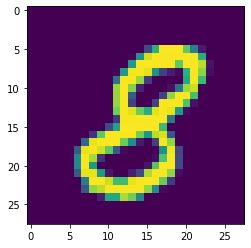

In [160]:
plt.imshow(X[5].reshape(28,28))

In [0]:
# Estrutura da rede/autoenoder
# entrada 784 -> oculta1 128 -> oculta2 64 -> oculta3 128 -> saida 784

# encoder
neuronios_entrada = 784
neuronios_oculta1 = 128
# encoded data/image
neuronios_oculta2 = 64
# decoder
neuronios_oculta3 = neuronios_oculta1
neuronios_saida = neuronios_entrada

In [0]:
tf.reset_default_graph()

xph = tf.placeholder(tf.float32, shape= [None, neuronios_entrada])

# Usar outros inicializadores de pesos em redes neurais complexas
# Xavier: sigmoid
# He: relu
inicializador = tf.variance_scaling_initializer()

# pesos
W = {
  'encoder_oculta1': tf.Variable(inicializador([neuronios_entrada, neuronios_oculta1])),
  'encoder_oculta2': tf.Variable(inicializador([neuronios_oculta1, neuronios_oculta2])),
  'decoder_oculta3': tf.Variable(inicializador([neuronios_oculta2, neuronios_oculta3])),
  'decoder_saida':   tf.Variable(inicializador([neuronios_oculta3, neuronios_saida])),
}

bias = {
  'encoder_oculta1': tf.Variable(inicializador([neuronios_oculta1])),
  'encoder_oculta2': tf.Variable(inicializador([neuronios_oculta2])),
  'decoder_oculta3': tf.Variable(inicializador([neuronios_oculta3])),
  'decoder_saida':   tf.Variable(inicializador([neuronios_saida])),
}

In [0]:
camada_oculta1 = tf.nn.relu( tf.add( bias['encoder_oculta1'], tf.matmul(xph, W['encoder_oculta1']) ) )
camada_oculta2 = tf.nn.relu( tf.add( bias['encoder_oculta2'], tf.matmul(camada_oculta1, W['encoder_oculta2']) ) )
camada_oculta3 = tf.nn.relu( tf.add( bias['decoder_oculta3'], tf.matmul(camada_oculta2, W['decoder_oculta3']) ) )
camada_saida = tf.nn.relu( tf.add( bias['decoder_saida'], tf.matmul(camada_oculta3, W['decoder_saida']) ) )

erro = tf.losses.mean_squared_error(xph, camada_saida)
otimizador = tf.train.AdamOptimizer(learning_rate= 0.001)
treinamento = otimizador.minimize(erro)
batch_size = 128

In [125]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(50):
    num_bathes = mnist.train.num_examples // batch_size
    for i  in range(num_bathes):
      X_batch, _ = mnist.train.next_batch(batch_size)
      custo, _ = sess.run([erro, treinamento], feed_dict= {xph: X_batch})
    print(f'epoch {epoch} - erro {custo}')
  imagens_codificadas = sess.run(camada_oculta2, feed_dict={xph: X})
  imagens_decodificadas = sess.run(camada_saida, feed_dict={xph: X})

epoch 0 - erro 0.016848698258399963
epoch 1 - erro 0.01497451588511467
epoch 2 - erro 0.013797769322991371
epoch 3 - erro 0.013323121704161167
epoch 4 - erro 0.012330169789493084
epoch 5 - erro 0.012109598144888878
epoch 6 - erro 0.011388036422431469
epoch 7 - erro 0.012297097593545914
epoch 8 - erro 0.012040928937494755
epoch 9 - erro 0.012678289785981178
epoch 10 - erro 0.011785385198891163
epoch 11 - erro 0.01257216464728117
epoch 12 - erro 0.011090886779129505
epoch 13 - erro 0.011887823231518269
epoch 14 - erro 0.011675277724862099
epoch 15 - erro 0.011374879628419876
epoch 16 - erro 0.013514352962374687
epoch 17 - erro 0.011400609277188778
epoch 18 - erro 0.010735491290688515
epoch 19 - erro 0.012076468206942081
epoch 20 - erro 0.011124180629849434
epoch 21 - erro 0.012208089232444763
epoch 22 - erro 0.011351133696734905
epoch 23 - erro 0.011030307970941067
epoch 24 - erro 0.010754810646176338
epoch 25 - erro 0.012227494269609451
epoch 26 - erro 0.011301236227154732
epoch 27 - er

In [126]:
imagens_codificadas.shape

(55000, 64)

In [127]:
imagens_codificadas[0]

array([1.1739703 , 2.270173  , 1.2007741 , 1.0590857 , 1.6693711 ,
       1.2740237 , 1.7318712 , 1.2760658 , 0.        , 1.2489411 ,
       2.3368833 , 0.        , 1.142151  , 0.62111855, 1.3025328 ,
       0.        , 0.        , 0.        , 1.9492395 , 2.6637537 ,
       0.9557799 , 1.4412998 , 1.2195247 , 1.7906606 , 1.6203414 ,
       2.1964216 , 1.075106  , 1.4873767 , 0.        , 1.0626483 ,
       0.73134017, 1.5843878 , 0.        , 1.9947588 , 1.6877174 ,
       0.        , 2.063252  , 0.74958634, 0.        , 2.2035284 ,
       1.6610653 , 1.5554299 , 1.5785942 , 1.4224269 , 0.        ,
       2.6625247 , 2.41333   , 1.4113619 , 0.        , 0.        ,
       2.9166822 , 1.2374645 , 0.86098456, 0.7264178 , 2.3369436 ,
       1.6550859 , 0.        , 2.9474587 , 2.157303  , 0.84666014,
       2.5930245 , 0.        , 2.2923927 , 1.5219873 ], dtype=float32)

In [128]:
imagens_decodificadas.shape

(55000, 784)

In [129]:
imagens_decodificadas[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [143]:
numero_imagens = 5
imagens_teste = np.random.randint(X.shape[0], size= numero_imagens)
imagens_teste

array([18067, 31235,  9428, 22294, 21181])

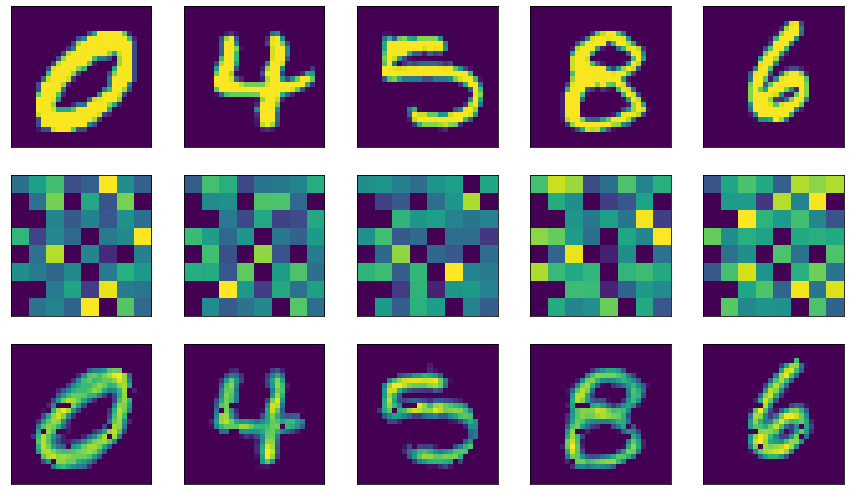

In [155]:
%matplotlib inline
plt.figure(figsize=(15,15))
for i, index_img in enumerate(imagens_teste):
  eixo = plt.subplot(5,5,i+1)
  plt.imshow(X[index_img].reshape(28,28))
  plt.xticks(())
  plt.yticks(())

  eixo = plt.subplot(5,5,i+1+numero_imagens)
  plt.imshow(imagens_codificadas[index_img].reshape(8,8))
  plt.xticks(())
  plt.yticks(())

  eixo = plt.subplot(5,5,i+1+numero_imagens * 2)
  plt.imshow(imagens_decodificadas[index_img].reshape(28,28))
  plt.xticks(())
  plt.yticks(())